In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

In [2]:
from sklearn.preprocessing import normalize, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
X = np.array(df.iloc[:,3:5])
y = np.array(df['Type'])
print("Shape of X:"+str(X.shape))
print("Shape of y:"+str(y.shape))

Shape of X:(214, 2)
Shape of y:(214,)


In [5]:
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
cm_bright = ListedColormap(['#ffafaf', '#c6c6ff','#ffaa00','#ffe2a8','#bfffe7','#c9f7ff','#9eff93'])

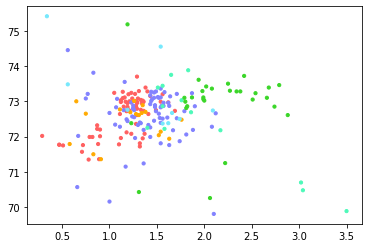

In [6]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=cm_dark,s=10,label=y)
plt.show()

<AxesSubplot:xlabel='Na', ylabel='RI'>

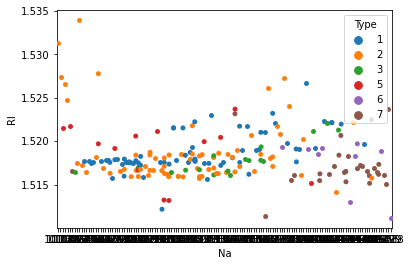

In [19]:
sns.stripplot(x='Na',y='RI',data=df,hue='Type')

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y)
print("Shape of X_Train:"+str(X_train.shape))
print("Shape of y_Train:"+str(Y_train.shape))
print("Shape of X_Test:"+str(X_test.shape))
print("Shape of y_Test:"+str(Y_test.shape))

Shape of X_Train:(160, 2)
Shape of y_Train:(160,)
Shape of X_Test:(54, 2)
Shape of y_Test:(54,)


In [9]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
pred = knn.predict(X_train)
pred

array([2, 1, 2, 2, 2, 1, 6, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 5,
       1, 2, 7, 5, 2, 2, 1, 1, 2, 6, 1, 1, 1, 1, 7, 2, 1, 2, 1, 2, 1, 2,
       2, 2, 7, 3, 1, 1, 5, 5, 1, 3, 7, 1, 1, 1, 2, 7, 1, 2, 2, 1, 2, 3,
       6, 1, 1, 2, 7, 2, 1, 5, 1, 3, 7, 3, 1, 5, 2, 2, 2, 7, 7, 2, 1, 1,
       7, 3, 1, 7, 1, 7, 1, 2, 1, 2, 2, 7, 1, 2, 1, 1, 1, 1, 1, 3, 1, 7,
       2, 6, 2, 2, 2, 1, 2, 2, 1, 1, 6, 2, 1, 1, 2, 5, 1, 2, 1, 3, 2, 1,
       2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 7, 1, 2, 2, 5, 2, 7,
       2, 2, 1, 2, 1, 1], dtype=int64)

In [11]:
accuracy = knn.score(X_train,Y_train)
print("The accuracy is :"+str(accuracy))

The accuracy is :0.75625


In [12]:
cnf_matrix = confusion_matrix(Y_train,pred)
print(cnf_matrix)

[[47  6  1  0  0  0]
 [ 9 44  0  0  1  2]
 [ 4  2  7  0  0  0]
 [ 0  3  0  7  0  1]
 [ 2  2  0  1  3  0]
 [ 1  3  0  0  1 13]]


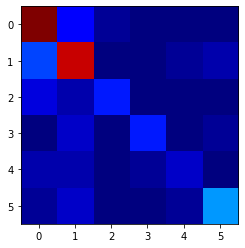

In [13]:
plt.imshow(cnf_matrix,cmap=plt.cm.jet)